In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Q1

data = pd.read_csv('user_profiles_for_ads.csv')
data.isnull().sum() # No Null Value
data = data.drop(['User ID'], axis=1)

In [ ]:
# Data Info
data.head() # Checks for first 5 columns
data.describe()
data.info()

GridSpec(1, 1)

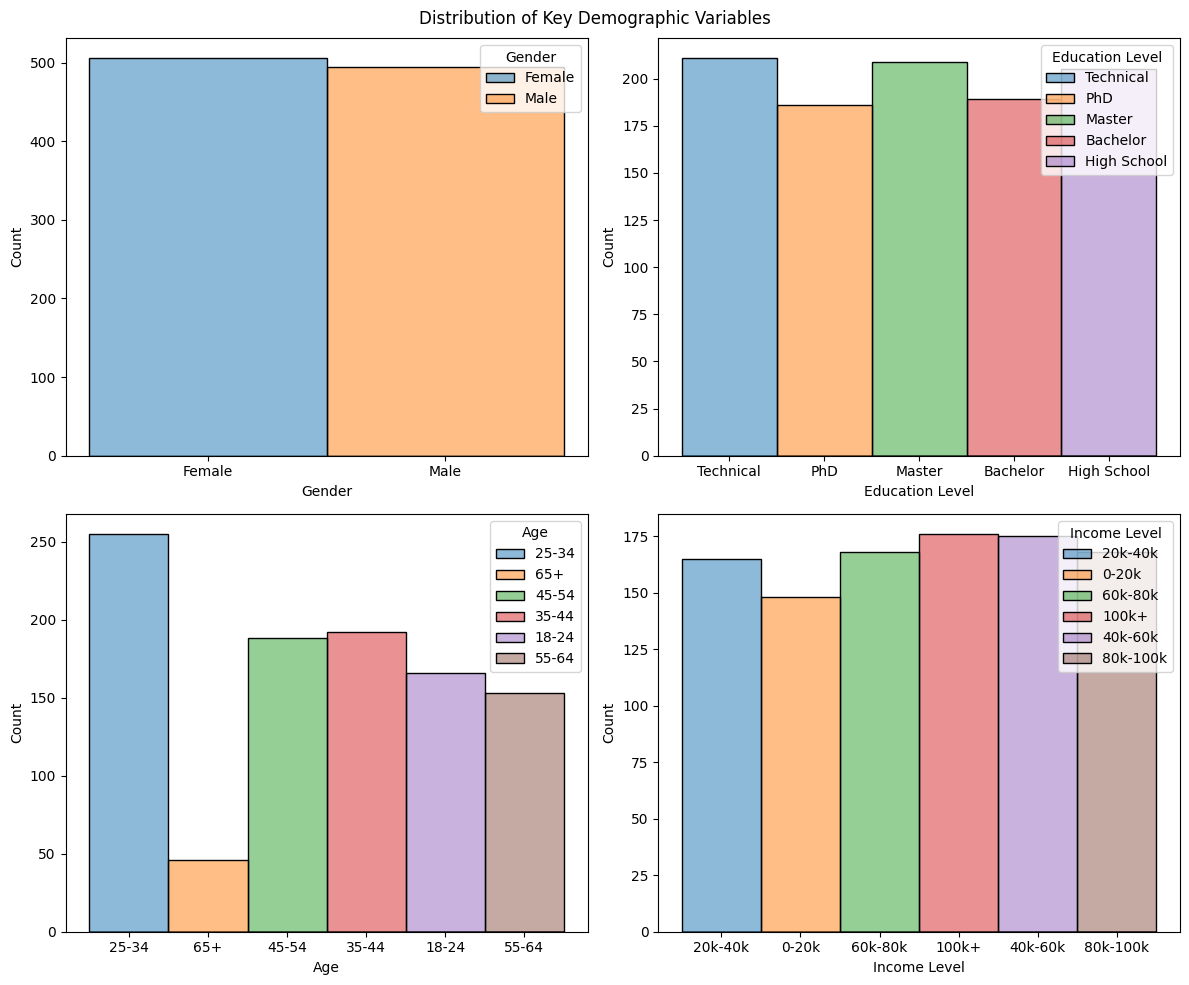

In [68]:
# Q2

fig, axis = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Distribution of Key Demographic Variables")
sns.histplot(data, x='Gender', hue='Gender', ax=axis[0,0])
sns.histplot(data, x='Education Level', hue='Education Level', ax=axis[0,1])
sns.histplot(data, x='Age', hue='Age', ax=axis[1,0])
sns.histplot(data, x='Income Level', hue='Income Level', ax=axis[1,1])
fig.tight_layout()

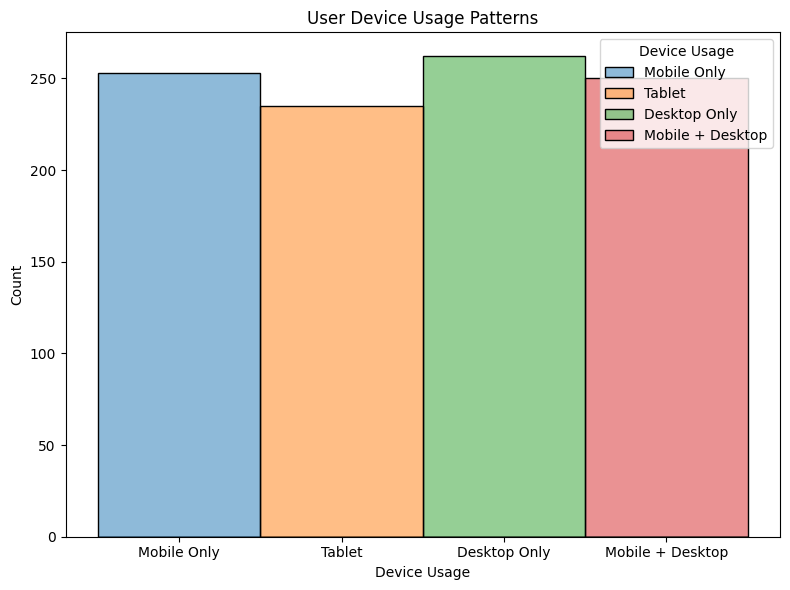

In [75]:
# Q3

plt.figure(figsize=(8, 6))
sns.histplot(data, x='Device Usage', hue='Device Usage')
plt.title("User Device Usage Patterns")
plt.tight_layout()

In [ ]:
# Q4

